## NAMA : ANDIKA INDRA KIRANA
## NIM : 2602204405
## MATA KULIAH : Data Engineering Programming

### Konsep Data Mining dan ETL (Extract, Transform, Load). Berikan contoh bagaimana proses ini diterapkan dalam sebuah proyek data analytics untuk perencanaan kota.

Data mining adalah proses penggalian informasi untuk mengidentifikasi pola, tren, dan data yang berguna dalam pengambilan keputusan perusahaan. Data mining menggunakan teknik statistika, pembelajaran mesin, dan algoritma khusus untuk menemukan pola tersembunyi yang mungkin tidak terlihat dengan analisis sederhana. Hasil dari data mining dapat digunakan untuk pengambilan keputusan berbasis data.

 ETL adalah proses integrasi data yang menggabungkan data dari berbagai sumber lalu dipindahkan ke satu penyimpanan.
 ETL terdiri dari tiga proses:

Extract – mengumpulkan dan mengidentifikasi data dari berbagai sumber. Data bisa berasal dari sumber terstruktur maupun tidak terstruktur, seperti dokumen dan database.
Transform – dikarenakan data yang dikumpulkan adalah data mentah, data perlu dibersihkan dan diubah ke format standar agar bisa disimpan ke database yang sudah disiapkan. Data transform juga mencakup menghapus data duplikat, tidak lengkap, atau salah.
Load – data yang formatnya sudah disesuaikan kemudian dipindahkan ke dalam database tujuan.

Perencanaan Transportasi dan Permukiman Kota Tangerang
Tujuan Proyek
Proyek ini bertujuan untuk:

Menganalisis pola kepadatan lalu lintas di berbagai wilayah Kota Tangerang.
Mengidentifikasi kebutuhan infrastruktur transportasi berdasarkan pola lalu lintas dan pertumbuhan populasi.
Mengoptimalkan rencana pembangunan permukiman sesuai dengan zonasi kota dan kebutuhan ruang hijau.
Langkah-Langkah ETL dan Data Mining:
1. Extract
Pengumpulan data dari berbagai sumber:

Data Lalu Lintas: Mengambil data dari sensor lalu lintas di titik-titik tertentu di Tangerang, seperti pada jalan utama, perempatan, atau flyover. Sumber data ini bisa dari Dinas Perhubungan atau teknologi sensor.
Data Sosial dan Demografi: Mengumpulkan data kepadatan penduduk dari BPS Tangerang, data persebaran lokasi pemukiman, dan data pertumbuhan ekonomi dari sumber statistik pemerintah.
Data Peta dan Infrastruktur: Mengambil data dari peta digital atau GIS untuk memahami lokasi, jaringan jalan, stasiun, halte, dan bangunan penting lainnya.
Data Cuaca: Memasukkan data cuaca dari BMKG untuk melihat pengaruh kondisi cuaca terhadap kepadatan lalu lintas.

2. Transform
Data Cleaning: Menghilangkan data duplikat, menangani nilai kosong, dan mengoreksi data yang tidak sesuai.
Data Integrasi: Menggabungkan data dari berbagai sumber ke dalam satu data set terpadu, seperti menggabungkan data lalu lintas dengan data lokasi dan data cuaca.
Normalisasi dan Penyiapan Format Data: Mengkonversi data ke format yang sesuai untuk analisis, misalnya menyiapkan data kepadatan lalu lintas per jam di setiap titik sensor atau membuat indeks kepadatan permukiman di setiap kelurahan.
Data Aggregation: Mengelompokkan data kepadatan lalu lintas berdasarkan waktu, misalnya pada jam sibuk dan hari kerja, serta lokasi tertentu seperti jalan utama dan pusat kota.

3. Load
Memuat data yang sudah diolah ke dalam data warehouse kota atau sistem Business Intelligence (BI), agar data ini dapat diakses dan divisualisasikan dengan mudah oleh pihak-pihak terkait, seperti Dinas Perhubungan dan Dinas Tata Kota.

4. Data Mining
Proses analisis data mining diterapkan untuk menemukan pola, hubungan, dan prediksi:

Clustering: Mengelompokkan wilayah-wilayah di Tangerang berdasarkan kepadatan lalu lintas dan kepadatan penduduk. Dengan ini, kita bisa menemukan area rawan macet atau area yang membutuhkan fasilitas transportasi tambahan.
Classification: Menggolongkan wilayah pemukiman menurut kategori kepadatan populasi, jenis fasilitas publik yang ada, dan aksesibilitas transportasi. Klasifikasi ini dapat membantu perencanaan untuk mengembangkan permukiman baru atau meningkatkan fasilitas di area tertentu.
Association Rules: Mencari hubungan antara kondisi lalu lintas dan faktor lain, seperti cuaca atau hari tertentu, misalnya, apakah ada peningkatan kemacetan pada hari Jumat atau selama hujan.

### Transformasi dan Normalisasi Data

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
DataFrame = pd.DataFrame({  "Customer_ID": ["1","2","3","4"],
                            "Name": ["Alice","Bob","Charlie","David"],
                            "Age": [25,32,28,40],
                            "Income": [50000,72000,None,85000],
                            "Spending_Score": [70,80,50,None]})

In [36]:
DataFrame

,Customer_ID,Name,Age,Income,Spending_Score
0,1,Alice,25,50000.0,70.0
1,2,Bob,32,72000.0,80.0
2,3,Charlie,28,NaN,50.0
3,4,David,40,85000.0,NaN


In [37]:
DataFrame['Income'].fillna(DataFrame['Income'].median(), inplace=True)
DataFrame['Spending_Score'].fillna(DataFrame['Spending_Score'].median(), inplace=True)

C:\Users\Asus ExpertBook\AppData\Local\Temp\ipykernel_18200\3770668894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DataFrame['Income'].fillna(DataFrame['Income'].median(), inplace=True)
C:\Users\Asus ExpertBook\AppData\Local\Temp\ipykernel_18200\3770668894.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [38]:
DataFrame

,Customer_ID,Name,Age,Income,Spending_Score
0,1,Alice,25,50000.0,70.0
1,2,Bob,32,72000.0,80.0
2,3,Charlie,28,72000.0,50.0
3,4,David,40,85000.0,70.0


In [39]:
DataFrame['Income_norm'] = (DataFrame['Income'] - DataFrame['Income'].min()) / (DataFrame['Income'].max() - DataFrame['Income'].min())

In [40]:
DataFrame['Spending_Score_norm'] = (DataFrame['Spending_Score'] - DataFrame['Spending_Score'].min()) / (DataFrame['Spending_Score'].max() - DataFrame['Spending_Score'].min())

In [41]:
DataFrame

,Customer_ID,Name,Age,Income,Spending_Score,Income_norm,Spending_Score_norm
0,1,Alice,25,50000.0,70.0,0.000000,0.666667
1,2,Bob,32,72000.0,80.0,0.628571,1.000000
2,3,Charlie,28,72000.0,50.0,0.628571,0.000000
3,4,David,40,85000.0,70.0,1.000000,0.666667


### Kustomisasi pada Subplot

Bagaimana cara melakukan kustomisasi plot di matplotlib untuk menampilkan
beberapa subplot dalam satu figure? Jelaskan langkah-langkah untuk membuat
plot 2x2 dan sebutkan fungsi-fungsi kustomisasi yang dapat digunakan.


Untuk dapat membuat beberapa subplot dalam satu figure dengan menggunakan matplotlib yang pertama kita harus meng import pustaka matplotlib lalu menggunakan fungsi plt.subplot untuk membuat beberapa plot.

Langkah-langkah fungsi untuk membuat plot 2x2 sebagai berikut:
1. Impor matplotlib.pyplot: Impor pustaka matplotlib.pyplot sebagai plt.
2. Siapkan Grid Subplot 2x2: Gunakan plt.subplots(nrows=2, ncols=2) untuk membuat grid berukuran 2x2, yang akan menghasilkan 4 area subplot.
3. Plot Data pada Setiap Subplot: Akses setiap subplot menggunakan indeks, dan gunakan fungsi plot() atau lainnya untuk menampilkan data.
4. Kustomisasi Setiap Subplot: Gunakan fungsi-fungsi kustomisasi untuk mengubah judul, label sumbu, warna, dan gaya garis pada setiap subplot.
5. Menampilkan Plot: Gunakan plt.show() untuk menampilkan semua subplot dalam satu figure.


Berikut adalah implementasi yang sudah dilakukan sesuai soal

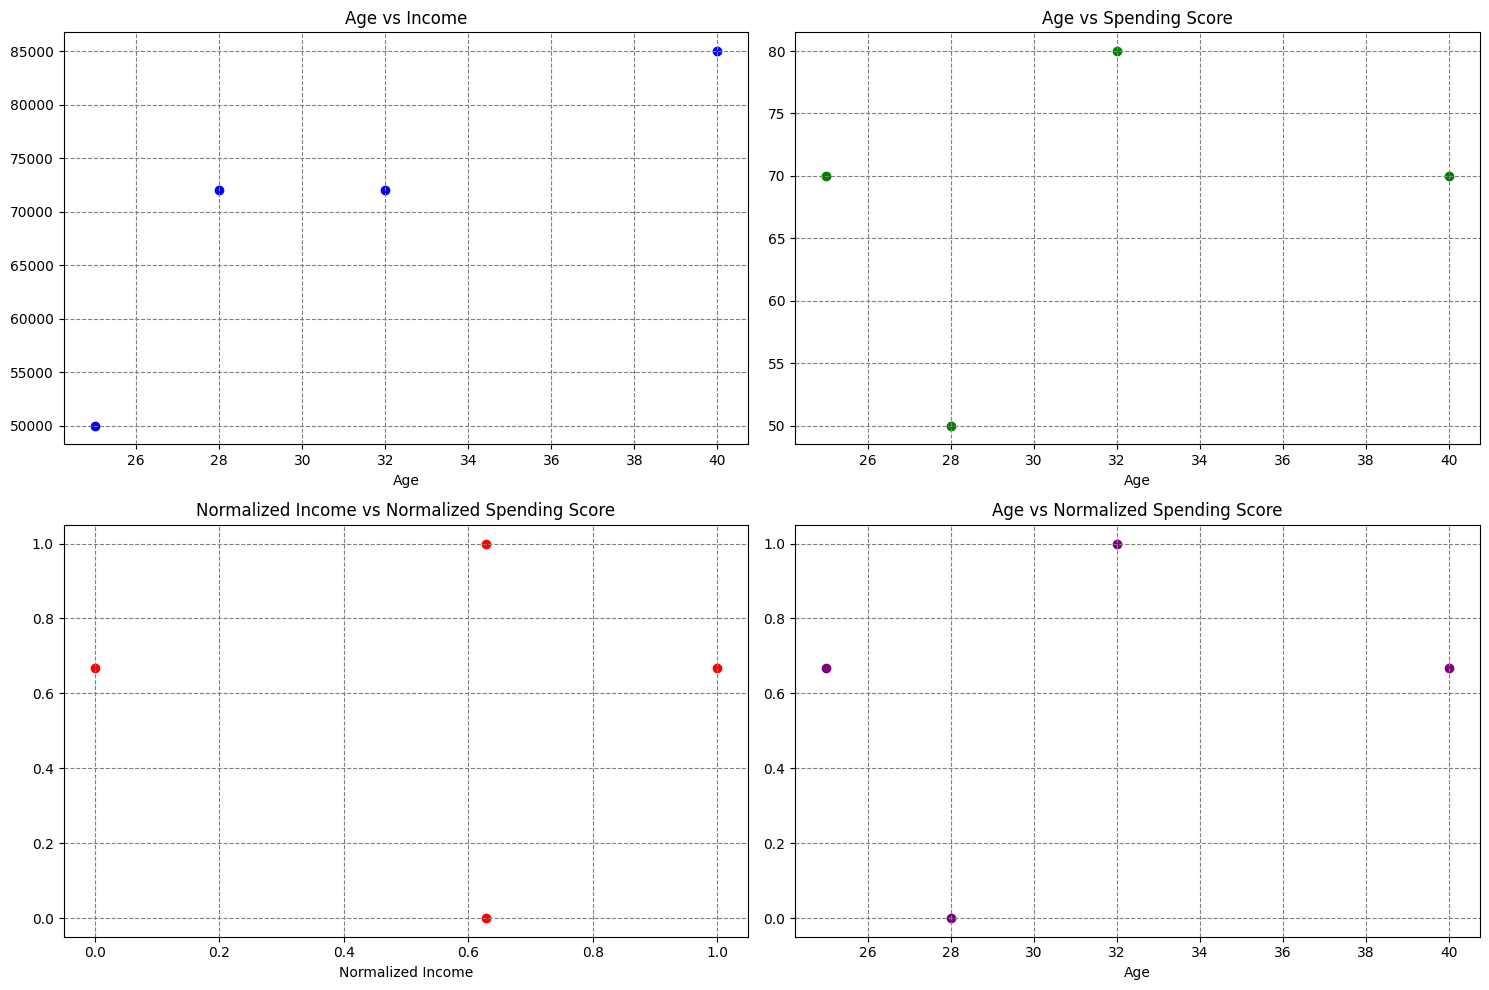

In [42]:
#plt.subplots(2, 2) membuat layout dengan 2 baris dan 2 kolom, menghasilkan total 4 subplot.
#fig.subplots_adjust Menyesuaikan jarak antar subplot

fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

#axs[0, 0] mengakses subplot di baris pertama dan kolom pertama.
#scatter() membuat grafik scatter antara kolom Age dan Income.
#set_title(), set_xlabel() menambahkan judul dan label
#grid() membuat garis bantu

axs[0, 0].scatter(DataFrame['Age'], DataFrame['Income'], color='blue')
axs[0, 0].set_title('Age vs Income')
axs[0, 0].set_xlabel('Age')
axs[0, 0].grid(color='gray', linestyle='--')

#axs[0, 1] mengakses subplot di baris pertama di kolom kedua.
#scatter() membuat grafik scatter antara kolom Age dan Spending_Score.
#set_title(), set_xlabel() menambahkan judul dan label
#grid() membuat garis bantu

axs[0, 1].scatter(DataFrame['Age'], DataFrame['Spending_Score'], color='green')
axs[0, 1].set_title('Age vs Spending Score')
axs[0, 1].set_xlabel('Age')
axs[0, 1].grid(color='gray', linestyle='--')

#axs[1, 0] mengakses subplot di baris di baris kedua dan kolom pertama.
#scatter() membuat grafik scatter antara kolom Income_norm dan Spending_Score_norm.
#set_title(), set_xlabel() menambahkan judul dan label
#grid() membuat garis bantu

axs[1, 0].scatter(DataFrame['Income_norm'], DataFrame['Spending_Score_norm'], color='red')
axs[1, 0].set_title('Normalized Income vs Normalized Spending Score')
axs[1, 0].set_xlabel('Normalized Income')
axs[1, 0].grid(color='gray', linestyle='--')

#axs[1, 1] mengakses subplot di baris di baris kedua dan kolom kedua.
#scatter() membuat grafik scatter antara kolom Age dan Spending_Score_norm.
#set_title(), set_xlabel() menambahkan judul dan label
#grid() membuat garis bantu

axs[1, 1].scatter(DataFrame['Age'], DataFrame['Spending_Score_norm'], color='purple')
axs[1, 1].set_title('Age vs Normalized Spending Score')
axs[1, 1].set_xlabel('Age')
axs[1, 1].grid(color='gray', linestyle='--')

#plt.tight_layout() menyesuaikan tata letak subplot agar tidak saling bertumpukan.
#plt.show() menampilkan seluruh subplot dalam satu figure.

plt.tight_layout()
plt.show()

### Analisis Rata-Rata Gaji Pegawai Berdasarkan Departemen

In [43]:
Df = pd.DataFrame({  "Employee_ID": ["1","2","3","4","5"],
                            "Name": ["Alice Smith","Bob Johnson","Charlie Lee","David Brown", "Emily Davis"],
                            "Department": ["IT","HR","Finance","IT","Finance"],
                            "Gender": ["F","M","M","M","F"],
                            "Age": [29,35,42,31,37],
                            "Salary": [6000,5500,7200,6800,7100]
})

Ubah table kedalam dataset employee_salary.csv

In [44]:
Df.to_csv('employee_salary.csv', index=False)

Gunakan pandas untuk membaca data employee_salary.csv

In [45]:
DataSet= pd.read_csv('employee_salary.csv')
DataSet

,Employee_ID,Name,Department,Gender,Age,Salary
0,1,Alice Smith,IT,F,29,6000
1,2,Bob Johnson,HR,M,35,5500
2,3,Charlie Lee,Finance,M,42,7200
3,4,David Brown,IT,M,31,6800
4,5,Emily Davis,Finance,F,37,7100


Kelompokkan data berdasarkan Department dan hitung rata-rata gaji
(Salary) untuk setiap departemen.

In [46]:
Mean_salary = DataSet.groupby('Department')['Salary'].mean().reset_index()

Mean_salary

,Department,Salary
0,Finance,7150.0
1,HR,5500.0
2,IT,6400.0


Buat pivot table yang menampilkan rata-rata gaji berdasarkan Gender
dan Department.

In [47]:
Pivot_Table = DataSet.pivot_table(
    index=['Gender','Department'], 
    values=['Salary'], 
    aggfunc='mean',
    margins=True,
    margins_name='Total'
    )

Tampilkan hasil pivot table dengan menambahkan margin (Total) untuk
mengetahui rata-rata gaji keseluruhan.

In [48]:
Pivot_Table

Salary
Gender Department        
F      Finance     7100.0
       IT          6000.0
M      Finance     7200.0
       HR          5500.0
       IT          6800.0
Total              6520.0